#### 步骤
- 去除平均值
- 计算协方差矩阵
- 计算协方差矩阵的特征值和特征向量
- 将特征值从大到小排序
- 保留最上面的N个特征向量
- 将数据转换到上述N各特征向量来那个构架的新空间中

In [1]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return mat(datArr)
    
def pca(dataMat, topNfeat=9999999):  #选择取多少特征
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = cov(meanRemoved, rowvar=0)  #如果rowvar为True(默认)，那么每一行代表一个变量，列中有观察值。
                                         #否则，关系将被调换:每一列表示一个变量，而行包含观察值
    print(">>>>>>>>>>>>>>>>>>>方差协方差矩阵的shape: ", shape(covMat))
    eigVals, eigVects = linalg.eig(mat(covMat)) #linalg.eig用于求解特征值，特征向量
    eigValInd = argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:, eigValInd]  #根据特征值筛选特征矩阵
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals  #原始数据被重构
    return lowDDataMat, reconMat

In [5]:
dataMat = loadDataSet('testSet.txt')
lowDMat, reconMat = pca(dataMat, 2)  #此例中原始数据就只有两个特征，如果参数选择2，那么重构后的矩阵和原矩阵一样
print(reconMat)
print(lowDMat)
print(shape(reconMat))
print(shape(lowDMat))

>>>>>>>>>>>>>>>>>>>方差协方差矩阵的shape:  (2, 2)
[[10.235186 11.321997]
 [10.122339 11.810993]
 [ 9.190236  8.904943]
 ...
 [ 9.854922  9.201393]
 [ 9.11458   9.134215]
 [10.334899  8.543604]]
[[-2.51033597  0.15840394]
 [-2.86915379  0.5092619 ]
 [ 0.09741085 -0.20728318]
 ...
 [-0.50166225 -0.62056456]
 [-0.05898712 -0.02335614]
 [-0.18978714 -1.37276015]]
(1000, 2)
(1000, 2)


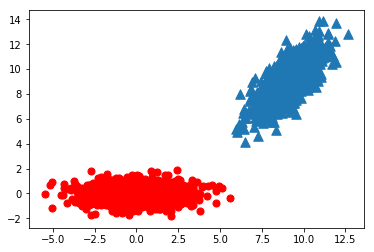

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(lowDMat[:, 0].flatten().A[0], lowDMat[:,1].flatten().A[0], marker='o', s=50, c='red')

# 示例：利用PCA对半导体制造数据降维
## 本例中有处理缺失值的步骤

In [7]:
def replaceNanWithMean():
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:, i].A))[0], i])
        datMat[nonzero(isnan(datMat[:, i].A))[0], i] = meanVal
    return datMat

In [11]:
dataMat = replaceNanWithMean()
print('>>>>>>>>>>>>>原始数据大小： ', shape(dataMat))
meanVals = mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals
covMat = cov(meanRemoved, rowvar=0)
print(">>>>>>>>>>>>>>协方差矩阵shape： ", shape(covMat))
eigVals, eigVects = linalg.eig(covMat)
print('>>>>>>>>>>>>>特征值shape： ', shape(eigVals))
print('>>>>>>>>>>>>>特征矩阵shape： ', shape(eigVects))
print(eigVals)

>>>>>>>>>>>>>原始数据大小：  (1567, 590)
>>>>>>>>>>>>>>协方差矩阵shape：  (590, 590)
>>>>>>>>>>>>>特征值shape：  (590,)
>>>>>>>>>>>>>特征矩阵shape：  (590, 590)
[ 5.34151979e+07  2.17466719e+07  8.24837662e+06  2.07388086e+06
  1.31540439e+06  4.67693557e+05  2.90863555e+05  2.83668601e+05
  2.37155830e+05  2.08513836e+05  1.96098849e+05  1.86856549e+05
  1.52422354e+05  1.13215032e+05  1.08493848e+05  1.02849533e+05
  1.00166164e+05  8.33473762e+04  8.15850591e+04  7.76560524e+04
  6.66060410e+04  6.52620058e+04  5.96776503e+04  5.16269933e+04
  5.03324580e+04  4.54661746e+04  4.41914029e+04  4.15532551e+04
  3.55294040e+04  3.31436743e+04  2.67385181e+04  1.47123429e+04
  1.44089194e+04  1.09321187e+04  1.04841308e+04  9.48876548e+03
  8.34665462e+03  7.22765535e+03  5.34196392e+03  4.95614671e+03
  4.23060022e+03  4.10673182e+03  3.41199406e+03  3.24193522e+03
  2.74523635e+03  2.35027999e+03  2.16835314e+03  1.86414157e+03
  1.76741826e+03  1.70492093e+03  1.66199683e+03  1.53948465e+03
  1.33096008e+03

## 后面值为0的特征意味着这些特征是其他特征的副本，可以通过其他特征来表示。前面15个值数量级大于10的5次方，相当于告诉我们只有部分重要特征

In [28]:
lowDMat, reconMat = pca(dataMat, 15)
print(shape(lowDMat))
print(shape(reconMat))
print(lowDMat)
#print(reconMat)

>>>>>>>>>>>>>>>>>>>方差协方差矩阵的shape:  (590, 590)
(1567, 15)
(1567, 590)
[[ 5.18389617e+03  3.02264772e+03 -6.88386243e+02 ... -4.30290845e+01
   2.19345058e+02  3.38243415e+02]
 [ 1.86669728e+03  4.02163902e+03  1.50557353e+03 ... -2.90834811e+02
   5.10579832e+02  1.54399962e+02]
 [ 3.15474165e+03  3.46198582e+03  1.85544208e+03 ...  4.15974207e+02
   1.24099869e+02  3.65922864e+02]
 ...
 [ 3.82121714e+03  1.57303288e+02  1.19846485e+03 ...  1.59488801e+02
   1.00989875e+02  2.05443641e+02]
 [ 4.27104024e+03  1.30047276e+03 -3.81634520e+02 ... -2.14629981e+01
  -4.07572745e+02  4.24173503e+00]
 [ 3.56287329e+03  3.72760720e+03  4.18435474e+02 ... -7.97712221e+02
   7.37768386e+01  1.90639765e+02]]


In [29]:
x = [1, 2, 4, 5, 6, 8, 10, 15, 12, 20]
print(x[:2:-1])
print(x[5:1:-1])

[20, 12, 15, 10, 8, 6, 5]
[8, 6, 5, 4]


# 风暴潮实例

In [6]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

def loadDataSet(fileName):
    fr = open(fileName)
    stringArr = [line.strip().split() for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return mat(datArr)
    
def pca(dataMat, topNfeat=9999999):  #选择取多少特征
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = cov(meanRemoved, rowvar=0)  #如果rowvar为True(默认)，那么每一行代表一个变量，列中有观察值。
                                         #否则，关系将被调换:每一列表示一个变量，而行包含观察值
    print(">>>>>>>>>>>>>>>>>>>方差协方差矩阵的shape: ", shape(covMat))
    eigVals, eigVects = linalg.eig(mat(covMat)) #linalg.eig用于求解特征值，特征向量
    eigValInd = argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:, eigValInd]  #根据特征值筛选特征矩阵
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals  #原始数据被重构
    return lowDDataMat, reconMat

In [17]:
dataMat = loadDataSet('fengbaochao.txt')
meanVals = mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals
covMat = cov(meanRemoved, rowvar=0)
print(">>>>>>>>>>>>>>协方差矩阵shape： ", shape(covMat))
eigVals, eigVects = linalg.eig(covMat)
print('>>>>>>>>>>>>>特征值shape： ', shape(eigVals))
print('>>>>>>>>>>>>>特征矩阵shape： ', shape(eigVects))
print(eigVals)
print(sum(eigVals[:1]) / sum(eigVals))

>>>>>>>>>>>>>>协方差矩阵shape：  (18, 18)
>>>>>>>>>>>>>特征值shape：  (18,)
>>>>>>>>>>>>>特征矩阵shape：  (18, 18)
[ 1.07050928e+08  6.60210864e+05  3.72378712e+04  3.32389036e+04
  1.23568994e+04  5.60622457e+03  3.52038973e+03  7.37055312e+02
  3.09550082e+02  1.16571744e+02  8.54930349e+01  2.43326971e+01
  1.20481833e+01  1.55459747e+00  1.52807358e-10  1.89744405e-12
 -1.71599812e-14  4.55304518e-13]
0.9930108802831361
